In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('final_hdb_details.csv')

# Beds

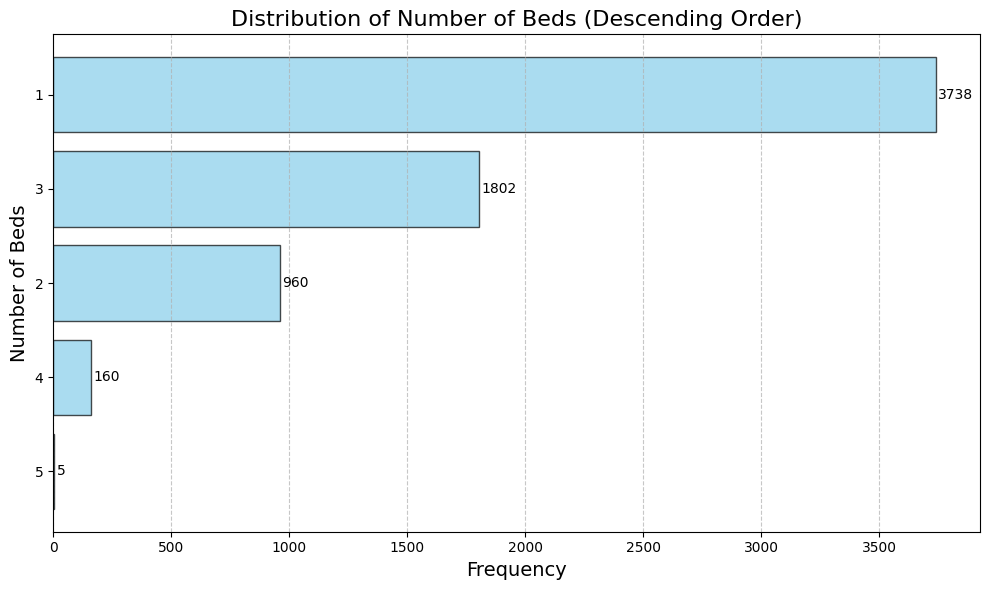

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('final_hdb_details.csv')
beds_counts = df['beds'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(beds_counts.index.astype(str), beds_counts, color='skyblue', edgecolor='black', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, int(width), va='center', fontsize=10)


plt.title('Distribution of Number of Beds (Descending Order)', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Number of Beds', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

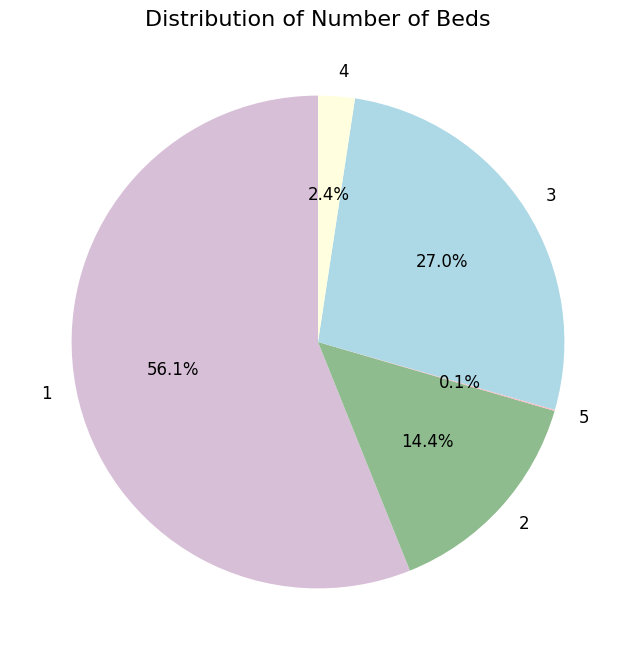

In [ ]:
import matplotlib.pyplot as plt

beds_counts = df['beds'].value_counts()
desired_order = [1, 2, 5, 3, 4]  
beds_counts = beds_counts.reindex(desired_order)
colors = ['thistle', 'darkseagreen', 'lightpink', 'lightblue', 'lightyellow']

plt.figure(figsize=(8, 8))
plt.pie(
    beds_counts,
    labels=beds_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'fontsize': 12},
    colors=colors
)
plt.title('Distribution of Number of Beds', fontsize=16)
plt.show()

# Baths

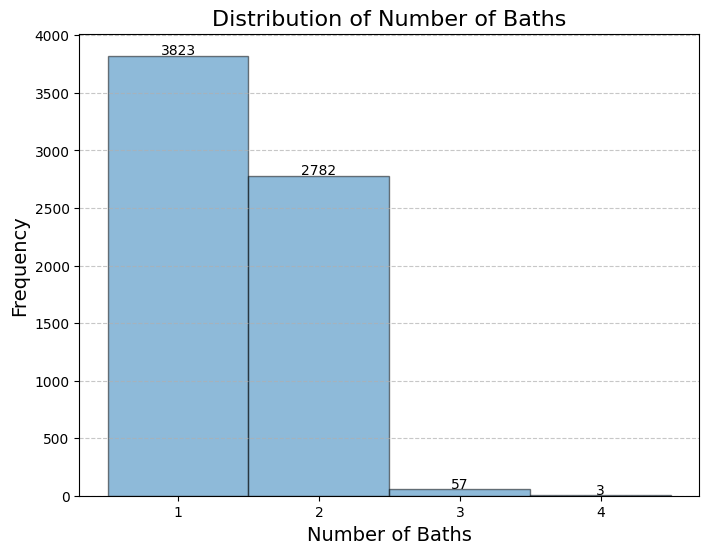

In [ ]:
plt.figure(figsize=(8, 6))
bins = range(df['baths'].min(), df['baths'].max() + 2)
hist_data, edges, _ = plt.hist(df['baths'], bins=bins, edgecolor='black', alpha=0.5)

for i in range(len(hist_data)):
    plt.text(edges[i] + 0.5, hist_data[i] + 10, int(hist_data[i]), ha='center', fontsize=10)

plt.xticks([edge + 0.5 for edge in edges[:-1]], range(df['baths'].min(), df['baths'].max() + 1))

plt.title('Distribution of Number of Baths', fontsize=16)
plt.xlabel('Number of Baths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

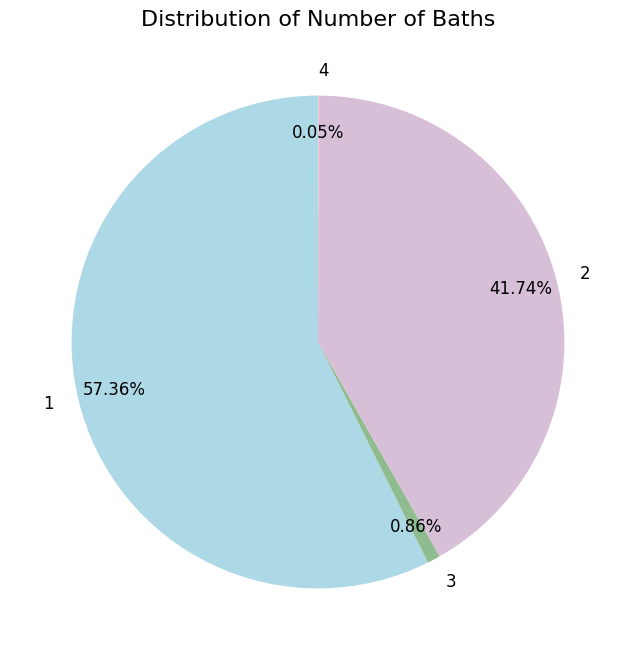

In [ ]:
baths_counts = df['baths'].value_counts()

desired_order = [1, 3, 2, 4]
baths_counts = baths_counts.reindex(desired_order)

colors = ['lightblue', 'darkseagreen', 'thistle', 'lightpink']

plt.figure(figsize=(8, 8))
plt.pie(
    baths_counts,
    labels=baths_counts.index,
    autopct='%.2f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 12},
    colors=colors 
)
plt.title('Distribution of Number of Baths', fontsize=16)
plt.show()

# Size

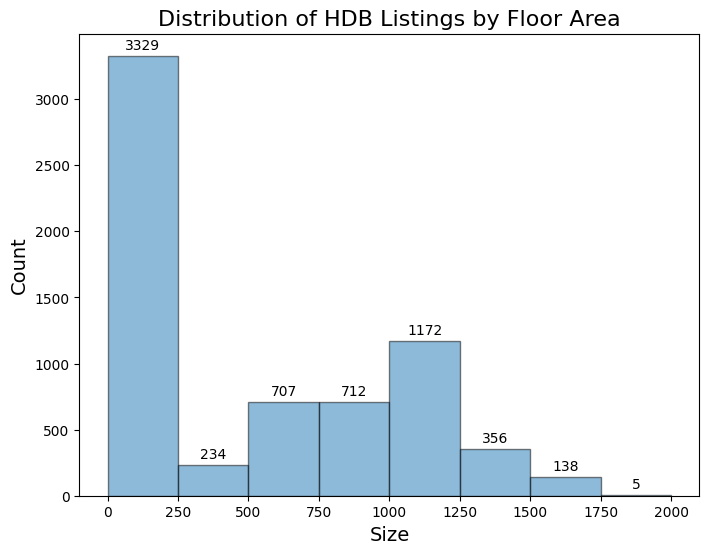

In [ ]:
plt.figure(figsize=(8, 6))
bins = range(0, 2001, 250)
hist_data, edges, _ = plt.hist(df['size'], bins=bins, edgecolor='black', alpha=0.5)

for i in range(len(hist_data)):
    plt.text(edges[i] + 125, hist_data[i] + 50, int(hist_data[i]), ha='center', fontsize=10)

plt.title('Distribution of HDB Listings by Floor Area', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(bins)

plt.show()

# price_per_sqft

## we classify the price_per_sqft column into low price, average price, and high price categories:

In [ ]:
df['price_category'] = pd.cut(
    df['price_per_sqft'],
    bins=[-float('inf'), 4, 7, float('inf')],
    labels=['Low Price(0)', 'Average Price(1)', 'High Price(2)']
)

price_category_counts = df['price_category'].value_counts()

df[['price_per_sqft', 'price_category']].head(), price_category_counts

(   price_per_sqft    price_category
 0            3.88      Low Price(0)
 1            2.96      Low Price(0)
 2            2.96      Low Price(0)
 3            4.50  Average Price(1)
 4            2.80      Low Price(0),
 price_category
 Low Price(0)        2483
 Average Price(1)    2424
 High Price(2)       1758
 Name: count, dtype: int64)

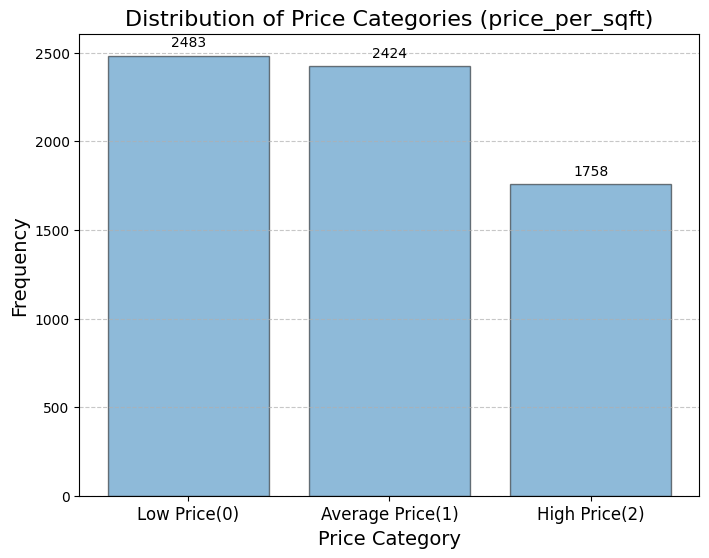

In [ ]:
df['price_category'] = pd.cut(
    df['price_per_sqft'],
    bins=[-float('inf'), 4, 7, float('inf')],
    labels=['Low Price(0)', 'Average Price(1)', 'High Price(2)']
)

price_category_counts = df['price_category'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(price_category_counts.index, price_category_counts, edgecolor='black', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, int(height), ha='center', fontsize=10)

plt.xticks(price_category_counts.index, fontsize=12)

plt.title('Distribution of Price Categories (price_per_sqft)', fontsize=16)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

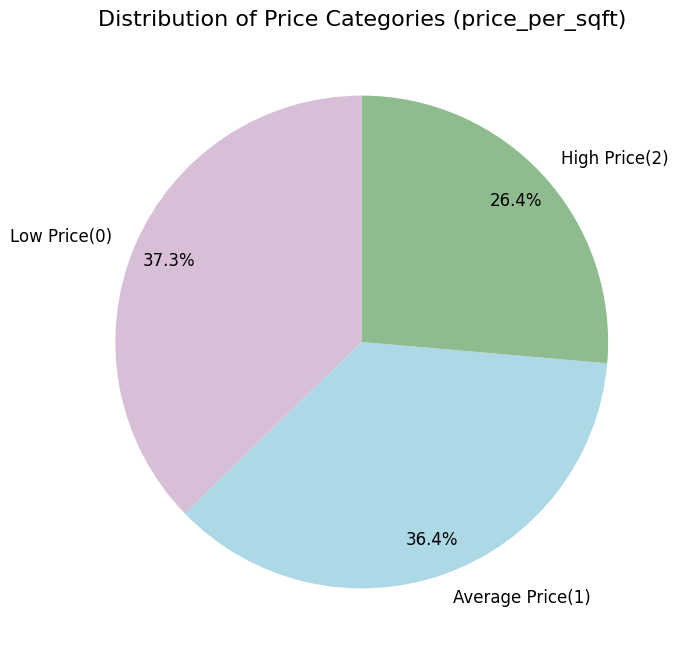

In [ ]:
price_category_counts = df['price_category'].value_counts()

colors = ['thistle', 'lightblue', 'darkseagreen']

plt.figure(figsize=(8, 8))
plt.pie(
    price_category_counts,
    labels=price_category_counts.index,
    autopct='%1.1f%%',  
    startangle=90,
    pctdistance=0.85,  
    textprops={'fontsize': 12},
    colors=colors 
)
plt.title('Distribution of Price Categories (price_per_sqft)', fontsize=16)
plt.show()

In [11]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


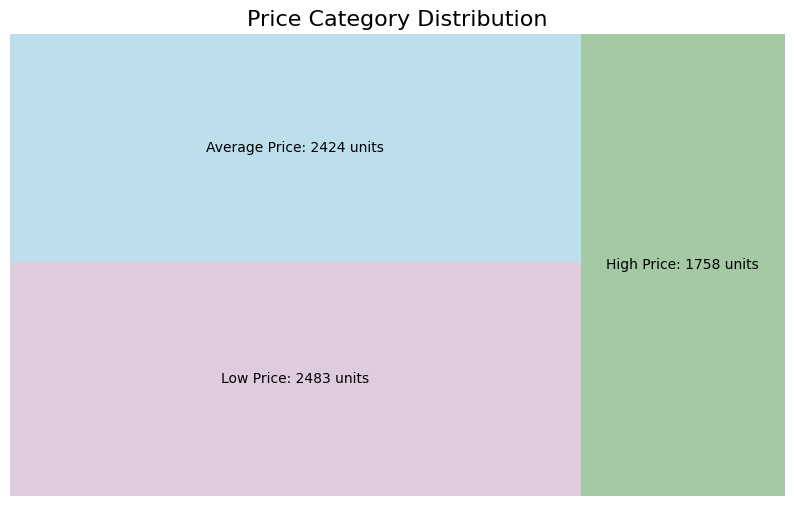

In [ ]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

df['price_category'] = pd.cut(
    df['price_per_sqft'],
    bins=[-float('inf'), 4, 7, float('inf')],
    labels=['Low Price', 'Average Price', 'High Price']
)

price_category_counts = df['price_category'].value_counts()

labels = [f"{cat}: {price_category_counts[cat]} units" for cat in price_category_counts.index]
sizes = price_category_counts.values

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=['thistle', 'lightblue', 'darkseagreen'])
plt.title('Price Category Distribution', fontsize=16)
plt.axis('off')
plt.show()

# floor_level

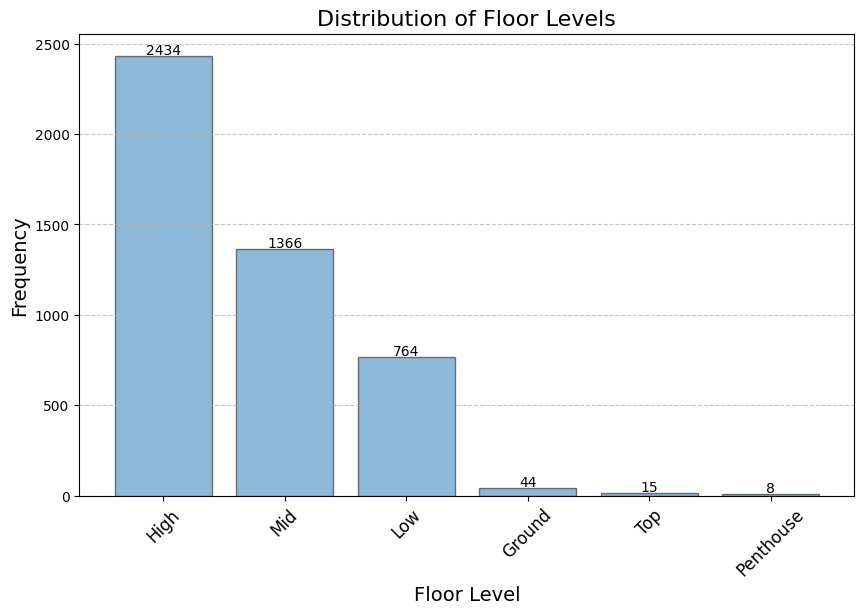

In [ ]:
floor_level_counts = df['floor_level'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(floor_level_counts.index, floor_level_counts, edgecolor='black', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, int(height), ha='center', fontsize=10)

plt.xticks(floor_level_counts.index, rotation=45, fontsize=12)

plt.title('Distribution of Floor Levels', fontsize=16)
plt.xlabel('Floor Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# furnishing

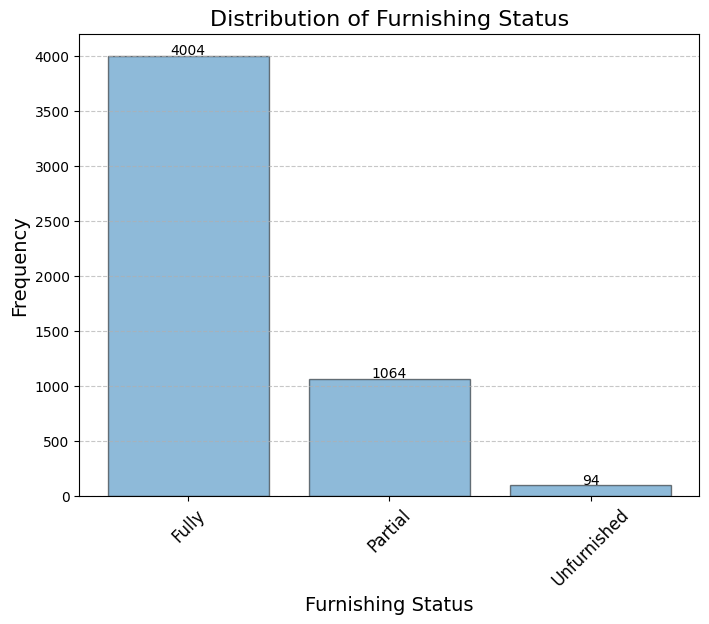

In [ ]:
furnishing_counts = df['furnishing'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(furnishing_counts.index, furnishing_counts, edgecolor='black', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, int(height), ha='center', fontsize=10)

plt.xticks(furnishing_counts.index, rotation=45, fontsize=12)

plt.title('Distribution of Furnishing Status', fontsize=16)
plt.xlabel('Furnishing Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

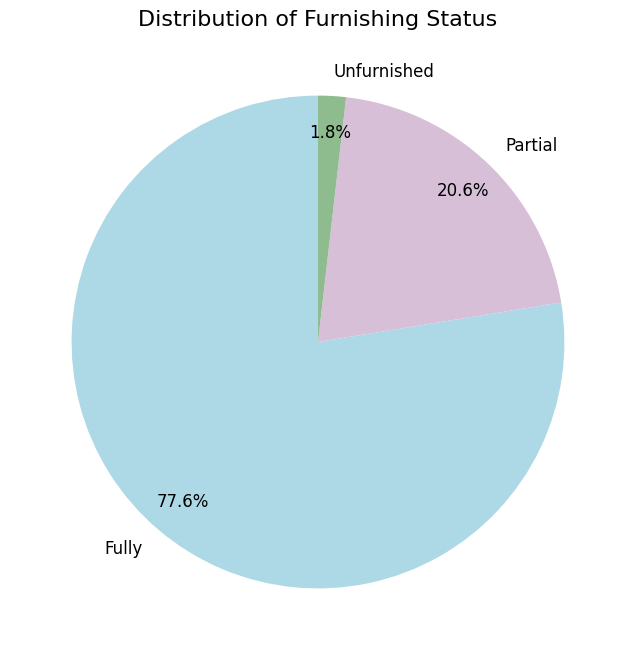

In [ ]:
import matplotlib.pyplot as plt

furnishing_counts = df['furnishing'].value_counts()

colors = ['lightblue', 'thistle', 'darkseagreen']

plt.figure(figsize=(10, 8))
plt.pie(
    furnishing_counts,
    labels=furnishing_counts.index,
    autopct='%1.1f%%', 
    startangle=90,
    pctdistance=0.85,  
    textprops={'fontsize': 12},
    colors=colors  
)
plt.title('Distribution of Furnishing Status', fontsize=16)
plt.show()

# built_year

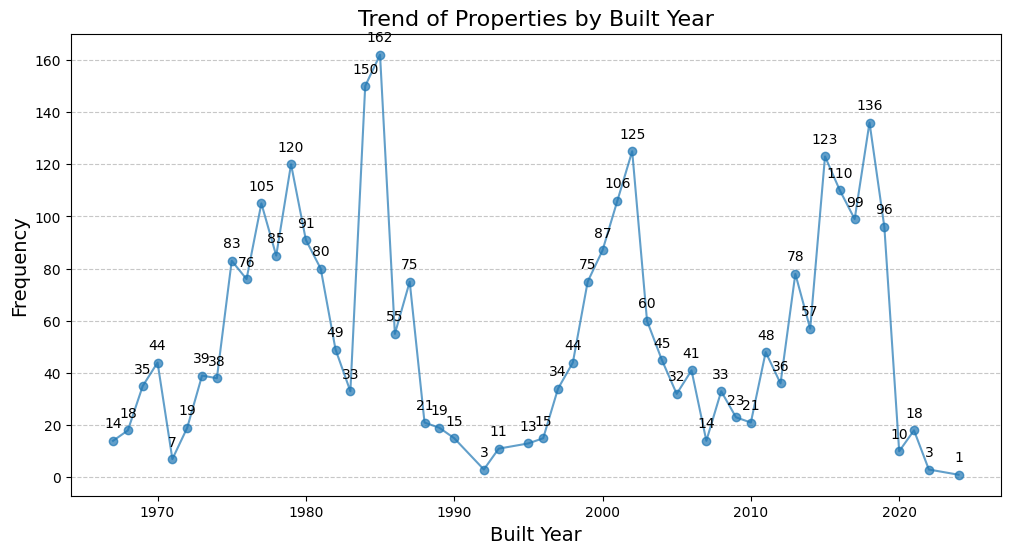

In [ ]:
build_year_counts = df['built_year'].dropna().value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(build_year_counts.index, build_year_counts, marker='o', linestyle='-', alpha=0.7)
plt.title('Trend of Properties by Built Year', fontsize=16)
plt.xlabel('Built Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for x, y in zip(build_year_counts.index, build_year_counts):
    plt.text(x, y + 5, int(y), ha='center', fontsize=10)

plt.show()

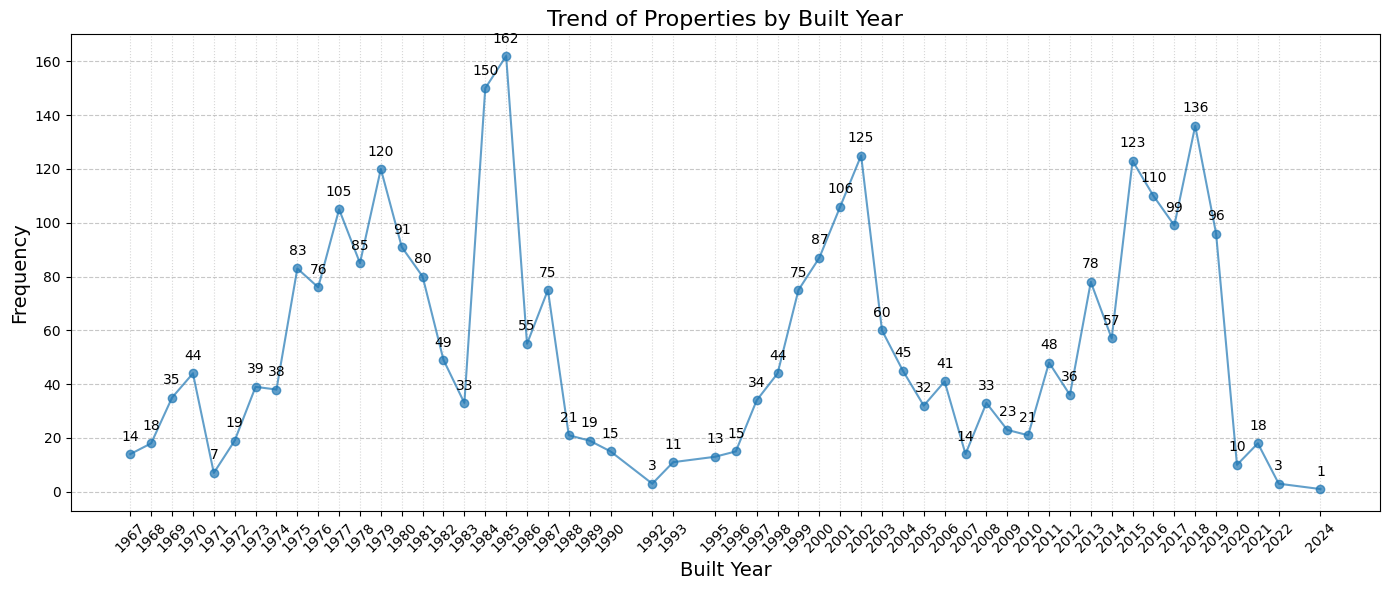

In [ ]:
build_year_counts = df['built_year'].dropna().value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.plot(build_year_counts.index, build_year_counts, marker='o', linestyle='-', alpha=0.7)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', which='both', linestyle=':', alpha=0.5)

plt.title('Trend of Properties by Built Year', fontsize=16)
plt.xlabel('Built Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(build_year_counts.index, rotation=45, fontsize=10)

for x, y in zip(build_year_counts.index, build_year_counts):
    plt.text(x, y + 5, int(y), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# property_type

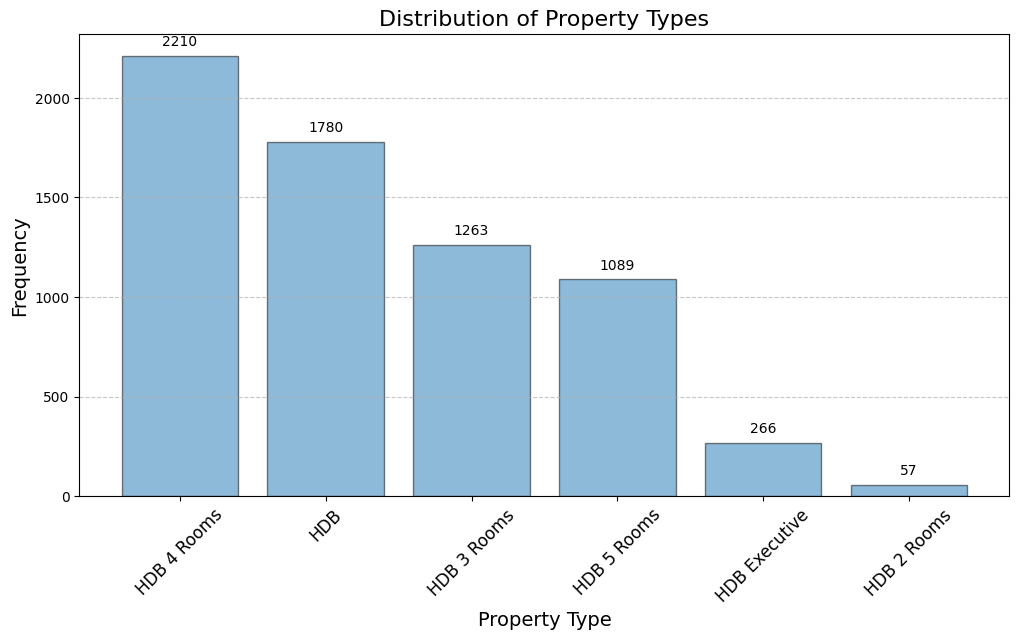

In [ ]:
property_type_counts = df['property_type'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(property_type_counts.index, property_type_counts, edgecolor='black', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, int(height), ha='center', fontsize=10)

plt.xticks(property_type_counts.index, rotation=45, fontsize=12)
plt.title('Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
#pip install pywaffle

In [ ]:
print(df['property_type'].unique())

['HDB 3 Rooms' 'HDB 5 Rooms' 'HDB 4 Rooms' 'HDB Executive' 'HDB 2 Rooms'
 'HDB']


In [21]:
df['property_type'] = df['property_type'].str.strip()

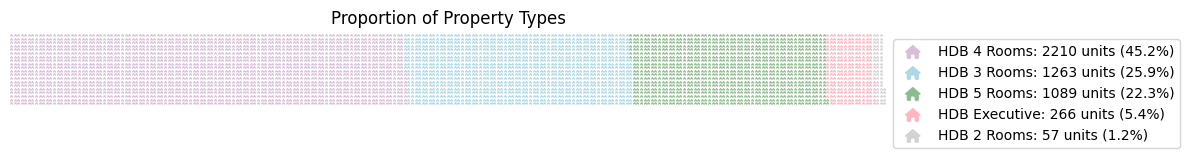

In [ ]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

selected_property_types = ['HDB 2 Rooms','HDB 3 Rooms', 'HDB 4 Rooms', 'HDB 5 Rooms', 'HDB Executive']

filtered_counts = property_type_counts[property_type_counts.index.isin(selected_property_types)]

total_count = filtered_counts.sum()
filtered_percentages = (filtered_counts / total_count * 100).round(1)

if filtered_counts.empty:
    print("No matching property types found. Please check the selected property types or column values.")
else:
    fig = plt.figure(
        FigureClass=Waffle,
        rows=20,  
        values=filtered_counts.to_dict(),
        labels=[f"{key}: {value} units ({filtered_percentages[key]}%)" for key, value in filtered_counts.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
        title={'label': 'Proportion of Property Types', 'loc': 'center'},
        figsize=(12, 12), 
        colors=['thistle', 'lightblue', 'darkseagreen', 'lightpink', 'lightgrey'],
        icons='home',  
        icon_size=2,  
        icon_legend=True  
    )

    plt.show()

# Correlation Marix

In [23]:
!pip install seaborn

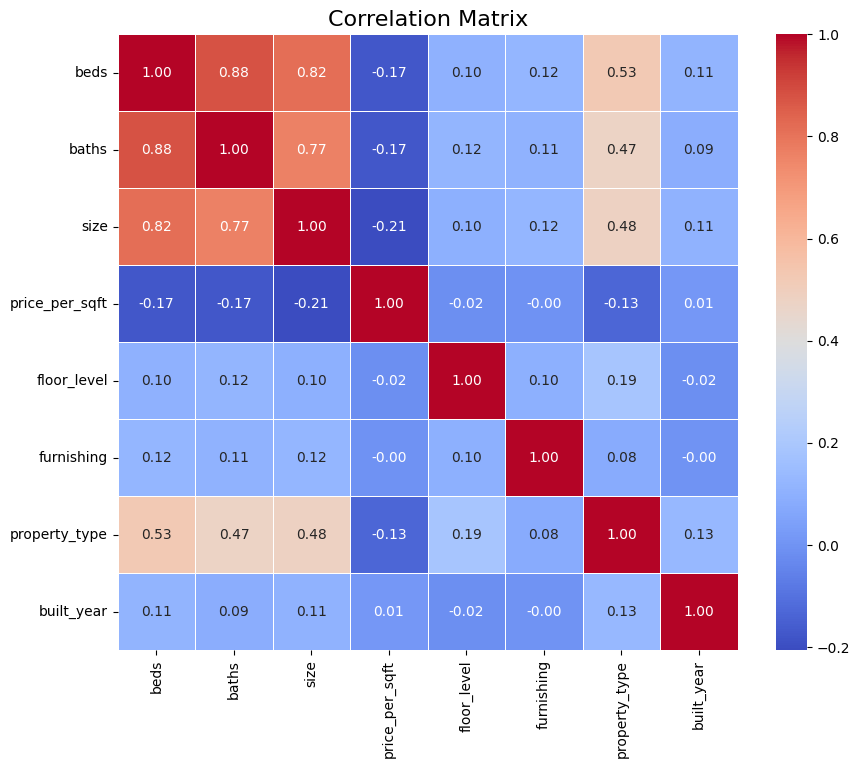

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = df.copy()
df_encoded['floor_level'] = df_encoded['floor_level'].astype('category').cat.codes
df_encoded['furnishing'] = df_encoded['furnishing'].astype('category').cat.codes
df_encoded['property_type'] = df_encoded['property_type'].astype('category').cat.codes

columns_to_analyze = ['beds', 'baths', 'size', 'price_per_sqft', 'floor_level', 'furnishing', 'property_type', 'built_year']
correlation_matrix = df_encoded[columns_to_analyze].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

/var/folders/wb/ff3fjnhn2md0mrz_h81y61b00000gn/T/ipykernel_7440/3949085520.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


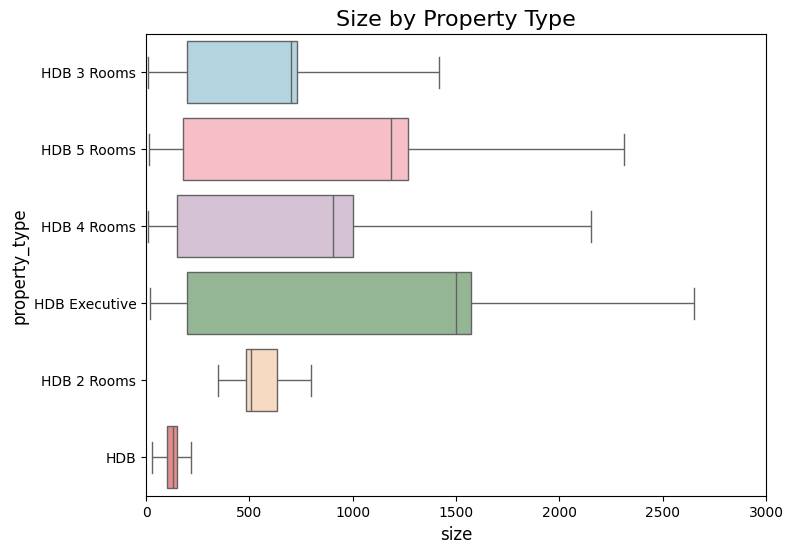

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    'HDB 3 Rooms': 'lightblue',
    'HDB 5 Rooms': 'lightpink',
    'HDB 4 Rooms': 'thistle',
    'HDB Executive': 'darkseagreen',
    'HDB 2 Rooms': 'peachpuff',
    'HDB': 'lightcoral'
}

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='size', 
    y='property_type',  
    palette=custom_palette,
    showfliers=False
)

plt.xlim(0, 3000)

plt.title('Size by Property Type', fontsize=16)
plt.xlabel('size', fontsize=12)
plt.ylabel('property_type', fontsize=12)
plt.show()

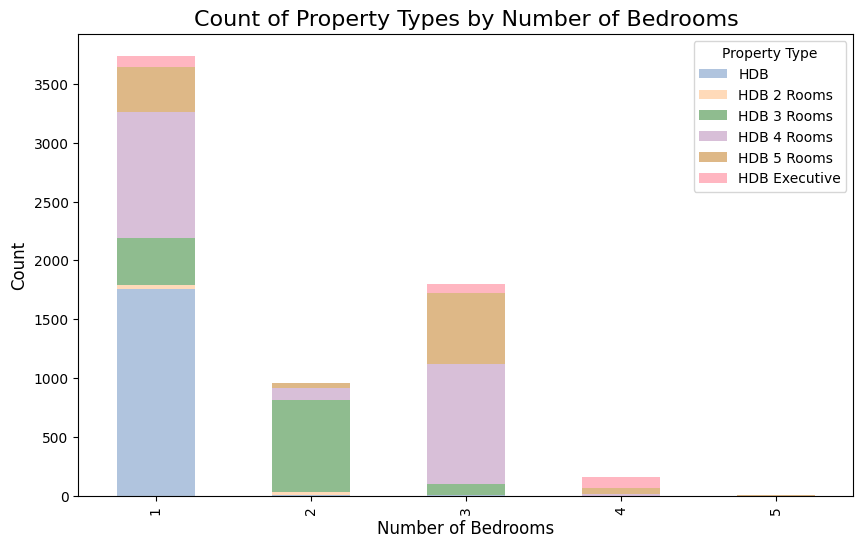

In [ ]:
crosstab_data = pd.crosstab(df['beds'], df['property_type'])

custom_colors = ['lightsteelblue', 'peachpuff', 'darkseagreen', 'thistle', 'burlywood', 'lightpink']

crosstab_data.plot(kind='bar', stacked=True, color=custom_colors, figsize=(10, 6))

plt.title('Count of Property Types by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Property Type', fontsize=10)
plt.show()

/var/folders/wb/ff3fjnhn2md0mrz_h81y61b00000gn/T/ipykernel_7440/1878511427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


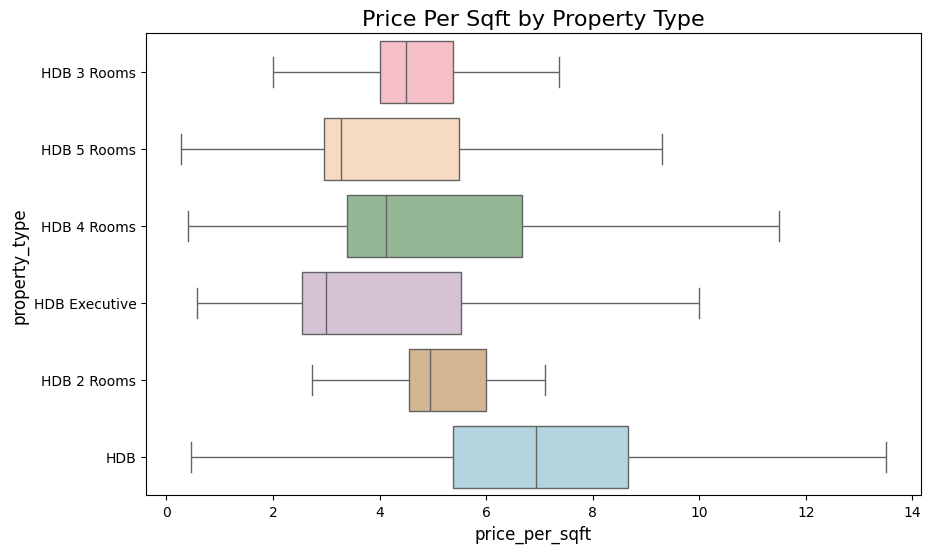

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {
    'HDB 3 Rooms': 'lightpink',
    'HDB 5 Rooms': 'peachpuff',
    'HDB 4 Rooms': 'darkseagreen',
    'HDB Executive': 'thistle',
    'HDB 2 Rooms': 'burlywood',
    'HDB': 'lightblue'
}

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='price_per_sqft',  
    y='property_type', 
    palette=custom_palette,  
    showfliers=False  
)

plt.title('Price Per Sqft by Property Type', fontsize=16)
plt.xlabel('price_per_sqft', fontsize=12)
plt.ylabel('property_type', fontsize=12)
plt.show()